In [1574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, random
from collections import deque
from scipy.stats import norm
from scipy.stats import binom, poisson, expon, geom
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import chi2, chi2_contingency, chisquare
from scipy.stats import f_oneway as anova_1way

from scipy.stats import kruskal # numeric Vs catogerical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
from scipy.stats import skew, shapiro #[Test for normality]

```
Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

Column Profiling:

MMMM-YY : Reporting Date (Monthly)
Driver_ID : Unique id for drivers
Age : Age of the driver
Gender : Gender of the driver – Male : 0, Female: 1
City : City Code of the driver
Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
Income : Monthly average Income of the driver
Date Of Joining : Joining date for the driver
LastWorkingDate : Last date of working for the driver
Joining Designation : Designation of the driver at the time of joining
Grade : Grade of the driver at the time of reporting
Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)



Concepts Tested:

Ensemble Learning- Bagging
Ensemble Learning- Boosting
KNN Imputation of Missing Values
Working with an imbalanced dataset
What "good" looks like:

Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.

Convert date-like features to their respective data type

Check for missing values and Prepare data for KNN Imputation

You may consider only numerical features for this purpose

Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)

Feature Engineering Steps:

Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

Statistical summary of the derived dataset

Check correlation among independent variables and how they interact with each other

One hot encoding of the categorical variable

Class Imbalance Treatment

Standardization of training data

Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning

Results Evaluation:

Classification Report

ROC AUC curve

Provide actionable Insights & Recommendations


Evaluation Criteria (100 Points):

Define Problem Statement and perform Exploratory Data Analysis (10 points)
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables)
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Data Preprocessing (50 Points)
KNN Imputation
Feature Engineering
Class Imbalance treatment
Standardization
Encoding
Model building (20 Points)
1 Ensemble - Bagging Algorithm
1 Ensemble - Boosting Algorithm
Results Evaluation (10 Points)
ROC AUC Curve & comments
Classification Report (Confusion Matrix etc)
Actionable Insights & Recommendations (10 Points)
```

# Business Case -  OLA - Ensemble Learning

- INDEX
    - (A) Problem Statements
    - (B) shape, null values and duplicates
    - (C) Column Profiling and grouping
    - (D) Exploratory data analysis (EDA): Features Analysis
    - (E) Feature Engineering
    - (F) Removing outliers
    - (G) Model building
    - (H) Actionable Insight and Recommendations

# (A) Problem Statements

<strong>to predict whether a driver will be leaving the company or not based on their attributes like</strong>

Demographics (city, age, gender etc.)<br>
Tenure information (joining date, Last Date)<br>
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)<br>

# (B) shape, null values and duplicates  

In [1576]:
Data = pd.read_csv("D:\Python programmes\Data Collection\ola_driver_scaler.csv")

In [1577]:
df = Data.copy(deep=True)

In [1578]:
df.shape

(19104, 14)

In [1579]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [1580]:
len(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'])

14

In [1581]:
len(['Dateofjoining', 'MMM-YY', 'LastWorkingDate','Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'])

13

In [1582]:
colms = ['Dateofjoining', 'MMM-YY', 'LastWorkingDate', 'Driver_ID', 'Age','Gender', 'City', 'Education_Level',
         'Joining Designation','Grade', 'Quarterly Rating', 'Income', 'Total Business Value']

In [1583]:
df = df.loc[:,colms]

In [1584]:
df.head()

,Dateofjoining,MMM-YY,LastWorkingDate,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value
0,24/12/18,01/01/19,NaN,1,28.0,0.0,C23,2,1,1,2,57387,2381060
1,24/12/18,02/01/19,NaN,1,28.0,0.0,C23,2,1,1,2,57387,-665480
2,24/12/18,03/01/19,03/11/19,1,28.0,0.0,C23,2,1,1,2,57387,0
3,11/06/20,11/01/20,NaN,2,31.0,0.0,C7,2,2,2,1,67016,0
4,11/06/20,12/01/20,NaN,2,31.0,0.0,C7,2,2,2,1,67016,0


In [1585]:
df.rename(columns = {'MMM-YY':'ReportingDate'}, inplace = True)

### checking null values

In [1586]:
pd.DataFrame([df.isnull().sum().values, (df.isnull().sum()/df.shape[0]*100).values], 
              columns=df.isnull().sum().index, 
              index=["total_null","percent_null"])

,Dateofjoining,ReportingDate,LastWorkingDate,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value
total_null,0.0,0.0,17488.000000,0.0,61.000000,52.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent_null,0.0,0.0,91.541039,0.0,0.319305,0.272194,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1587]:
# percentage row having null values
p = 1-df.dropna(inplace=False).shape[0]/len(df)
print(p*100,"% rows have null values")

91.59338358458962 % rows have null values


#### drop null rows for Age and Gender

In [1588]:
df = df[df["Age"].notnull() & df["Gender"].notnull()]

In [1589]:
df.shape

(18991, 13)

In [1590]:
pd.DataFrame([df.isnull().sum().values, (df.isnull().sum()/df.shape[0]*100).values], 
              columns=df.isnull().sum().index, 
              index=["total_null","percent_null"])

,Dateofjoining,ReportingDate,LastWorkingDate,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value
total_null,0.0,0.0,17385.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent_null,0.0,0.0,91.543363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1591]:
# percentage row having null values
p = 1-df.dropna(inplace=False).shape[0]/len(df)
print(p*100,"% rows have null values")

91.54336264546365 % rows have null values


In [1592]:
df.shape

(18991, 13)

### removing duplicate rows

In [1593]:
df.duplicated().sum()

0

# (C) Column Profiling and grouping

### data summary

In [1594]:
df.head()

,Dateofjoining,ReportingDate,LastWorkingDate,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value
0,24/12/18,01/01/19,NaN,1,28.0,0.0,C23,2,1,1,2,57387,2381060
1,24/12/18,02/01/19,NaN,1,28.0,0.0,C23,2,1,1,2,57387,-665480
2,24/12/18,03/01/19,03/11/19,1,28.0,0.0,C23,2,1,1,2,57387,0
3,11/06/20,11/01/20,NaN,2,31.0,0.0,C7,2,2,2,1,67016,0
4,11/06/20,12/01/20,NaN,2,31.0,0.0,C7,2,2,2,1,67016,0


In [1595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18991 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dateofjoining         18991 non-null  object 
 1   ReportingDate         18991 non-null  object 
 2   LastWorkingDate       1606 non-null   object 
 3   Driver_ID             18991 non-null  int64  
 4   Age                   18991 non-null  float64
 5   Gender                18991 non-null  float64
 6   City                  18991 non-null  object 
 7   Education_Level       18991 non-null  int64  
 8   Joining Designation   18991 non-null  int64  
 9   Grade                 18991 non-null  int64  
 10  Quarterly Rating      18991 non-null  int64  
 11  Income                18991 non-null  int64  
 12  Total Business Value  18991 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.0+ MB


In [1596]:
df["Dateofjoining"]=df["Dateofjoining"].astype("datetime64")

In [1597]:
df["ReportingDate"]=df["ReportingDate"].astype("datetime64")

In [1598]:
df["LastWorkingDate"] = df["LastWorkingDate"].astype("datetime64")

In [1599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18991 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Dateofjoining         18991 non-null  datetime64[ns]
 1   ReportingDate         18991 non-null  datetime64[ns]
 2   LastWorkingDate       1606 non-null   datetime64[ns]
 3   Driver_ID             18991 non-null  int64         
 4   Age                   18991 non-null  float64       
 5   Gender                18991 non-null  float64       
 6   City                  18991 non-null  object        
 7   Education_Level       18991 non-null  int64         
 8   Joining Designation   18991 non-null  int64         
 9   Grade                 18991 non-null  int64         
 10  Quarterly Rating      18991 non-null  int64         
 11  Income                18991 non-null  int64         
 12  Total Business Value  18991 non-null  int64         
dtypes: datetime64[ns

In [1600]:
df["churn"] = df["LastWorkingDate"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [1601]:
df.head()

,Dateofjoining,ReportingDate,LastWorkingDate,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value,churn
0,2018-12-24,2019-01-01,NaT,1,28.0,0.0,C23,2,1,1,2,57387,2381060,0
1,2018-12-24,2019-02-01,NaT,1,28.0,0.0,C23,2,1,1,2,57387,-665480,0
2,2018-12-24,2019-03-01,2019-03-11,1,28.0,0.0,C23,2,1,1,2,57387,0,1
3,2020-11-06,2020-11-01,NaT,2,31.0,0.0,C7,2,2,2,1,67016,0,0
4,2020-11-06,2020-12-01,NaT,2,31.0,0.0,C7,2,2,2,1,67016,0,0


In [1602]:
df["churn"].value_counts()

0    17385
1     1606
Name: churn, dtype: int64

In [1603]:
df[df["churn"]==1]["Driver_ID"].value_counts()

1       1
1887    1
1901    1
1900    1
1899    1
       ..
951     1
949     1
948     1
947     1
2787    1
Name: Driver_ID, Length: 1606, dtype: int64

In [1604]:
churn_ids = set(df[df["churn"]==1]["Driver_ID"].value_counts().index)

In [1605]:
df["churn"] = df["Driver_ID"].apply(lambda x: 1 if x in churn_ids else 0)

In [1606]:
df[df["churn"]==0][45:60]

,Dateofjoining,ReportingDate,LastWorkingDate,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value,churn
148,2018-05-07,2019-11-01,NaT,26,42.0,0.0,C14,2,1,3,4,121529,13097320,0
149,2018-05-07,2019-12-01,NaT,26,42.0,0.0,C14,2,1,3,4,121529,1086370,0
150,2018-05-07,2020-01-01,NaT,26,42.0,0.0,C14,2,1,3,2,121529,732410,0
151,2018-05-07,2020-02-01,NaT,26,42.0,0.0,C14,2,1,3,2,121529,1511840,0
152,2018-05-07,2020-03-01,NaT,26,42.0,0.0,C14,2,1,4,4,132577,9226690,0
153,2018-05-07,2020-04-01,NaT,26,42.0,0.0,C14,2,1,4,2,132577,1940050,0
154,2018-05-07,2020-05-01,NaT,26,42.0,0.0,C14,2,1,4,2,132577,970030,0
155,2018-05-07,2020-06-01,NaT,26,42.0,0.0,C14,2,1,4,2,132577,0,0
156,2018-05-07,2020-07-01,NaT,26,42.0,0.0,C14,2,1,4,2,132577,153590,0
157,2018-05-07,2020-08-01,NaT,26,42.0,0.0,C14,2,1,4,2,132577,1710410,0


In [1607]:
df.columns

Index(['Dateofjoining', 'ReportingDate', 'LastWorkingDate', 'Driver_ID', 'Age',
       'Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade',
       'Quarterly Rating', 'Income', 'Total Business Value', 'churn'],
      dtype='object')

In [1608]:
agg_type = {"Age":"last","Gender":"last","City":"last","Education_Level":"last",
            "Joining Designation":"mean","Grade":"median","Quarterly Rating":"median","Income":"median",
            "Total Business Value":"mean","churn":"last"}

In [1609]:
cols = ["Age","Gender","City","Education_Level","Joining Designation","Grade","Quarterly Rating",
        "Income","Total Business Value","churn"]

In [1610]:
df = df.groupby(["Driver_ID"])[cols].aggregate(agg_type).reset_index(inplace=False)

In [1611]:
df["Age"] = df["Age"].astype("int64")

In [1612]:
df["Gender"] = df["Gender"].astype("int64")

In [1613]:
df["Joining Designation"] = df["Joining Designation"].astype("int64")

In [1614]:
df["Grade"] = df["Grade"].astype("int64")

In [1615]:
df["Income"] = df["Income"].astype("int64")

In [1616]:
df["Total Business Value"] = np.round(df["Total Business Value"],2)

In [1617]:
df

,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value,churn
0,1,28,0,C23,2,1,1,2.0,57387,571860.00,1
1,2,31,0,C7,2,2,2,1.0,67016,0.00,0
2,4,43,0,C13,2,2,2,1.0,65603,70000.00,1
3,5,29,0,C9,0,1,1,1.0,46368,40120.00,1
4,6,31,1,C11,1,3,3,2.0,78728,253000.00,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,0,C24,0,2,3,3.0,82815,906200.83,0
2377,2785,34,1,C9,0,1,1,1.0,12105,0.00,1
2378,2786,45,0,C19,0,2,2,2.0,35370,312787.78,1
2379,2787,28,1,C20,2,1,1,1.5,69498,162971.67,1


# (D) Exploratory data analysis (EDA): Features Analysis

### churn vs non-churn

In [1618]:
df["churn"].value_counts()

1    1606
0     775
Name: churn, dtype: int64

<AxesSubplot:>

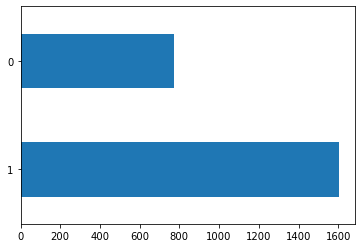

In [1619]:
df["churn"].value_counts().plot(kind="barh")

### column: Age

<AxesSubplot:>

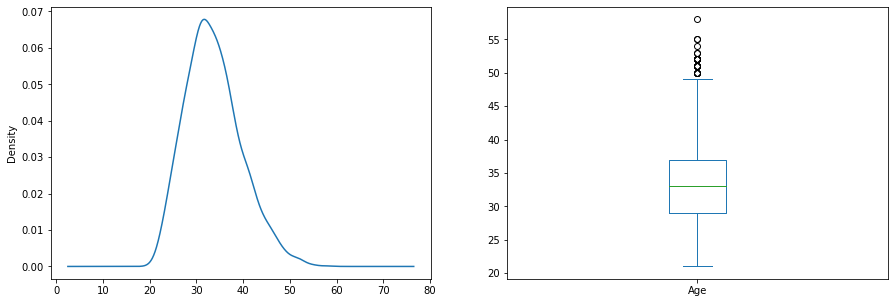

In [1620]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df["Age"].plot(kind="kde")
plt.subplot(1,2,2)
df["Age"].plot(kind="box")

In [1621]:
#[Test for normality]
print("skew=",skew(df["Age"])," and ", shapiro(df["Age"]))

skew= 0.5388498505929552  and  ShapiroResult(statistic=0.9784436821937561, pvalue=1.6225029841990349e-18)


<AxesSubplot:>

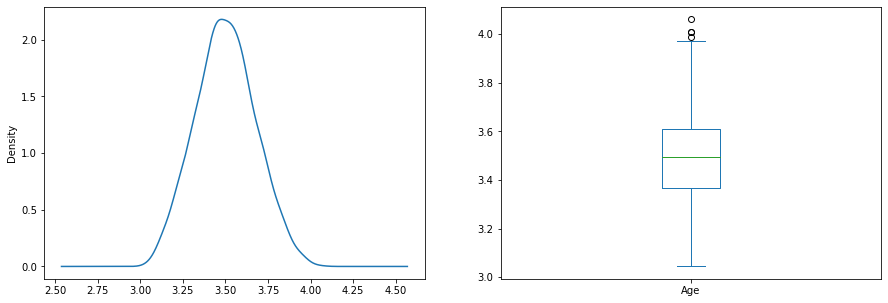

In [1622]:
# plot after log transform
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
np.log(df["Age"]).plot(kind="kde")
plt.subplot(1,2,2)
np.log(df["Age"]).plot(kind="box")

In [1623]:
#[Test for normality]
print("skew=",skew(np.log(df["Age"]))," and ", shapiro(np.log(df["Age"])))

skew= 0.08417682885781796  and  ShapiroResult(statistic=0.9947600364685059, pvalue=1.866949759232739e-07)


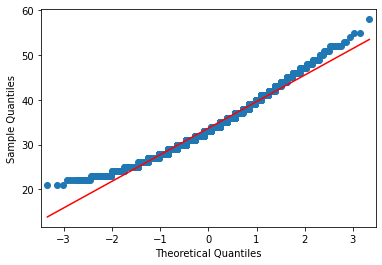

In [1624]:
# Quantile-Quantile plot for 1sample
qqplot(df["Age"], dist=norm, line="r")
plt.show()

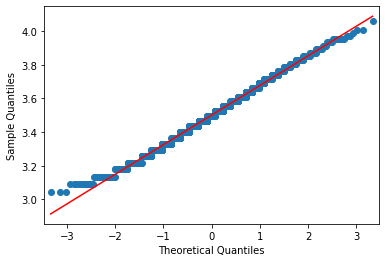

In [1625]:
# Quantile-Quantile plot for 1sample
qqplot(np.log(df["Age"]), dist=norm, line="r")
plt.show()

### column: Income

<AxesSubplot:>

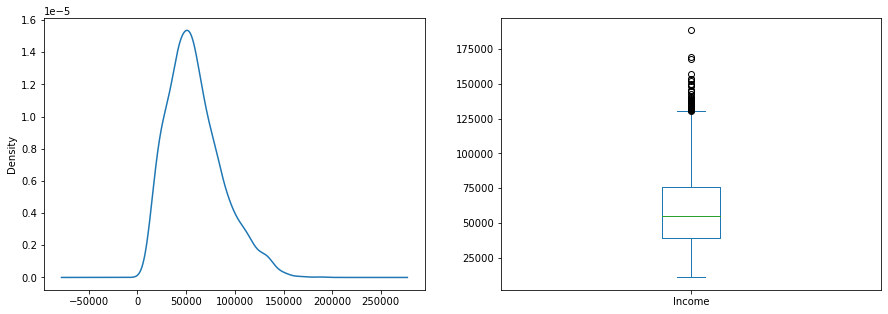

In [1626]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df["Income"].plot(kind="kde")
plt.subplot(1,2,2)
df["Income"].plot(kind="box")

In [1627]:
print("skew=",skew(df["Income"])," and ",shapiro(df["Income"]))

skew= 0.776498901513912  and  ShapiroResult(statistic=0.9593228101730347, pvalue=2.631266010444414e-25)


<AxesSubplot:>

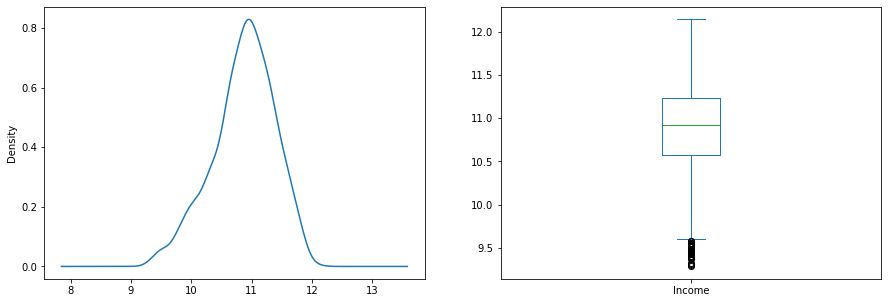

In [1628]:
# plot after log transform
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
np.log(df["Income"]).plot(kind="kde")
plt.subplot(1,2,2)
np.log(df["Income"]).plot(kind="box")

In [1629]:
print("skew=",skew(np.log(df["Income"]))," and ",shapiro(np.log(df["Income"])))

skew= -0.4644665694021273  and  ShapiroResult(statistic=0.9832392930984497, pvalue=3.8641571585336257e-16)


In [1630]:
df["Income"].quantile(0.025)

17045.5

In [1631]:
df["Income"].quantile(0.5)

55276.0

In [1632]:
df["Income"].quantile(0.975)

127286.5

<AxesSubplot:>

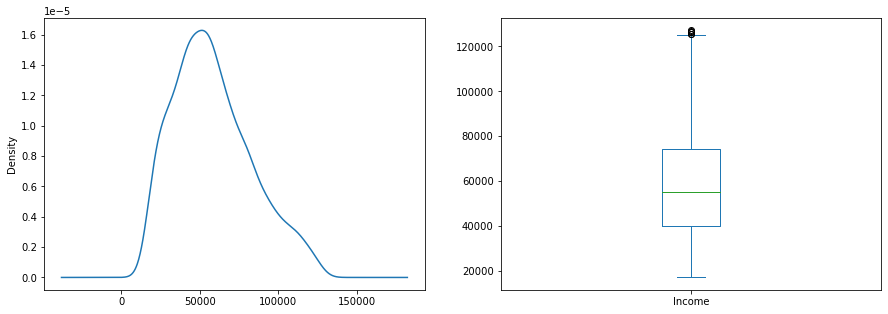

In [1633]:
# plot after removing outliers
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"].plot(kind="kde")
plt.subplot(1,2,2)
df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"].plot(kind="box")

In [1634]:
skew(df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"])

0.5518097126585549

In [1635]:
shapiro(df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"])

ShapiroResult(statistic=0.9669366478919983, pvalue=2.2399113442527352e-22)

<AxesSubplot:>

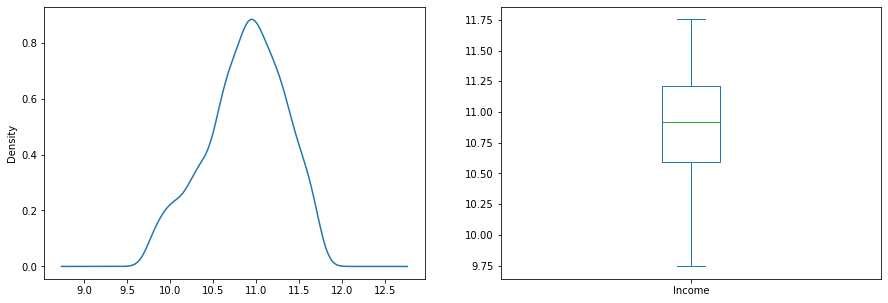

In [1636]:
# plot after remiving outliers and taking log transform
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
np.log(df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"]).plot(kind="kde")
plt.subplot(1,2,2)
np.log(df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"]).plot(kind="box")

In [1637]:
skew(np.log(df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"]))

-0.36305525478609213

In [1638]:
shapiro(np.log(df[(df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))]["Income"]))

ShapiroResult(statistic=0.9806327819824219, pvalue=5.5245460818505795e-17)

### column: Total Business Value

<AxesSubplot:>

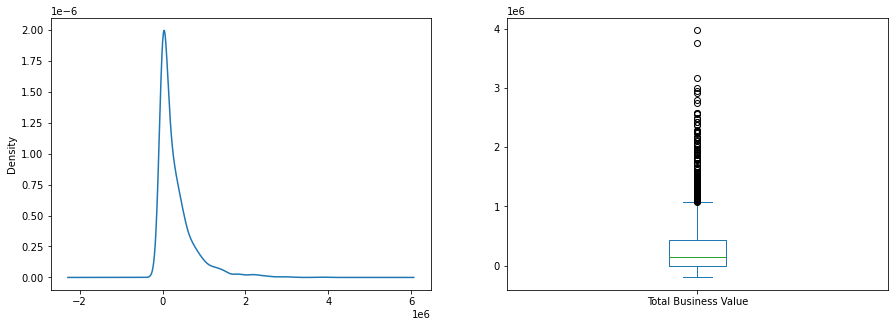

In [1639]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df["Total Business Value"].plot(kind="kde")
plt.subplot(1,2,2)
df["Total Business Value"].plot(kind="box")

In [1640]:
skew(df["Total Business Value"])

2.6714150672103325

In [1641]:
shapiro(df["Total Business Value"])

ShapiroResult(statistic=0.7061681151390076, pvalue=0.0)

<AxesSubplot:>

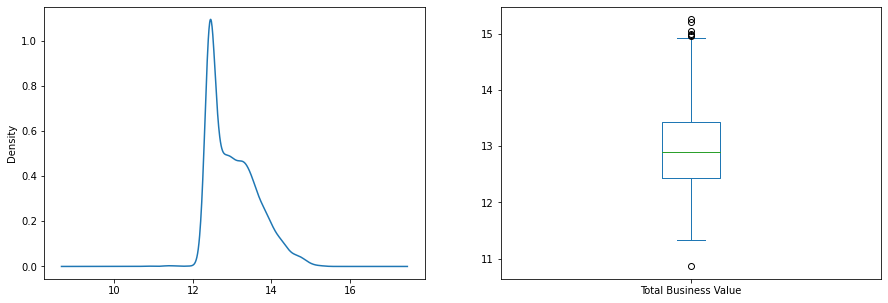

In [1642]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
np.log(250000+df["Total Business Value"]).plot(kind="kde")
plt.subplot(1,2,2)
np.log(250000+df["Total Business Value"]).plot(kind="box")

### column: City

<AxesSubplot:>

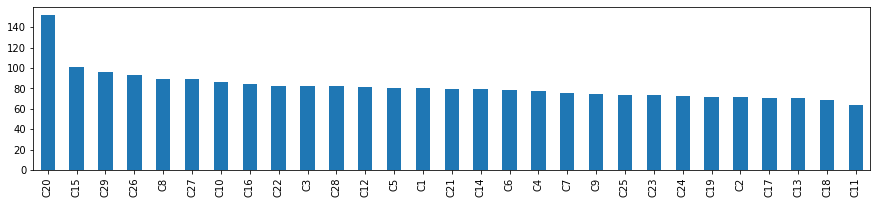

In [1643]:
plt.figure(figsize=(15,3))
df["City"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Quarterly Rating')

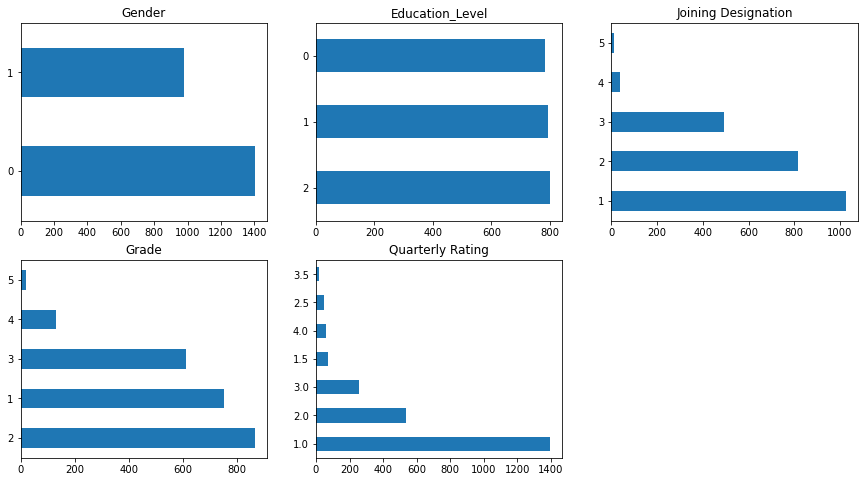

In [1644]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
df["Gender"].value_counts().plot(kind="barh")
plt.title("Gender")
plt.subplot(2,3,2)
df["Education_Level"].value_counts().plot(kind="barh")
plt.title("Education_Level")
plt.subplot(2,3,3)
df["Joining Designation"].value_counts().plot(kind="barh")
plt.title("Joining Designation")
plt.subplot(2,3,4)
df["Grade"].value_counts().plot(kind="barh")
plt.title("Grade")
plt.subplot(2,3,5)
df["Quarterly Rating"].value_counts().plot(kind="barh")
plt.title("Quarterly Rating")

# (E) Feature Engineering

In [1645]:
df.shape

(2381, 11)

In [1646]:
df.head()

,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value,churn
0,1,28,0,C23,2,1,1,2.0,57387,571860.0,1
1,2,31,0,C7,2,2,2,1.0,67016,0.0,0
2,4,43,0,C13,2,2,2,1.0,65603,70000.0,1
3,5,29,0,C9,0,1,1,1.0,46368,40120.0,1
4,6,31,1,C11,1,3,3,2.0,78728,253000.0,0


In [1647]:
df["Age"] = np.log(df["Age"])

In [1648]:
df["Income"]=np.log(df["Income"])

In [1649]:
df["Total Business Value"] = np.log(250000+df["Total Business Value"])

# (E) Removing outliers

In [1650]:
df.head()

,Driver_ID,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value,churn
0,1,3.332205,0,C23,2,1,1,2.0,10.957573,13.619325,1
1,2,3.433987,0,C7,2,2,2,1.0,11.112687,12.429216,0
2,4,3.761200,0,C13,2,2,2,1.0,11.091377,12.676076,1
3,5,3.367296,0,C9,0,1,1,1.0,10.744365,12.578050,1
4,6,3.433987,1,C11,1,3,3,2.0,11.273754,13.128345,0


In [1651]:
mask1 = (df["Income"]>=df["Income"].quantile(0.025))&(df["Income"]<=df["Income"].quantile(0.975))

In [1652]:
mask2 = (df["Total Business Value"]>=df["Total Business Value"].quantile(0.025))&(df["Total Business Value"]<=df["Total Business Value"].quantile(0.975))

In [1653]:
df = df[mask1 & mask2]

In [1654]:
df = df.drop(columns=["Driver_ID"], inplace=False).reset_index(drop=True)

In [1655]:
df.head()

,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value,churn
0,3.332205,0,C23,2,1,1,2.0,10.957573,13.619325,1
1,3.433987,0,C7,2,2,2,1.0,11.112687,12.429216,0
2,3.761200,0,C13,2,2,2,1.0,11.091377,12.676076,1
3,3.367296,0,C9,0,1,1,1.0,10.744365,12.578050,1
4,3.433987,1,C11,1,3,3,2.0,11.273754,13.128345,0


In [1656]:
df.loc[:,["Age","Income","Total Business Value"]].corr()

,Age,Income,Total Business Value
Age,1.000000,0.169215,0.250455
Income,0.169215,1.000000,0.211051
Total Business Value,0.250455,0.211051,1.000000


In [1657]:
corr_matrix = df.loc[:,["Age","Income","Total Business Value"]].corr()

<AxesSubplot:>

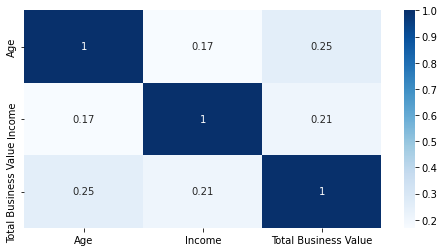

In [1658]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")

# (G) Model building

In [1659]:
df.shape

(2203, 10)

In [1660]:
X = df.drop(columns=["churn"], inplace=False)
y = df["churn"].values

In [1661]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### train_test_split

In [1662]:
from sklearn.model_selection import train_test_split

In [1663]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [1664]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40, stratify=y)

In [1665]:
X_train

,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value
2,3.761200,0,C13,2,2,2,1.0,11.091377,12.676076
2041,3.555348,0,C7,2,2,2,2.0,10.894923,13.196428
189,3.258097,0,C4,2,3,3,1.0,11.005893,12.756013
1213,3.295837,0,C15,2,1,1,1.0,10.589887,12.429216
1940,3.218876,0,C28,1,1,4,1.0,11.509831,14.203697
...,...,...,...,...,...,...,...,...,...
585,3.295837,0,C22,0,3,3,1.0,11.566561,12.429216
1246,3.737670,0,C13,2,2,2,2.0,10.913669,13.517028
1001,3.610918,0,C22,1,1,1,1.0,10.663943,12.746775
852,3.258097,1,C28,1,1,1,1.0,11.009026,12.429216


In [1666]:
y_train[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

### `oversampling training data` 

Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets.

In [1667]:
tdf = X_train

In [1668]:
tdf["churn"]=y_train

In [1669]:
tdf["churn"].value_counts()

1    1205
0     557
Name: churn, dtype: int64

In [1670]:
tdf.head()

,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value,churn
2,3.761200,0,C13,2,2,2,1.0,11.091377,12.676076,1
2041,3.555348,0,C7,2,2,2,2.0,10.894923,13.196428,0
189,3.258097,0,C4,2,3,3,1.0,11.005893,12.756013,0
1213,3.295837,0,C15,2,1,1,1.0,10.589887,12.429216,1
1940,3.218876,0,C28,1,1,4,1.0,11.509831,14.203697,1


In [1671]:
tdf_oversample = pd.concat([tdf,tdf[tdf["churn"]==0].sample(n=1205-557, replace=True)],axis=0).reset_index(drop=True,inplace=False)

In [1672]:
tdf_oversample["churn"].value_counts()

1    1205
0    1205
Name: churn, dtype: int64

In [1673]:
X_train = tdf_oversample.drop(columns=["churn"], inplace=False)
y_train = tdf_oversample["churn"].values

In [1674]:
X_train

,Age,Gender,City,Education_Level,Joining Designation,Grade,Quarterly Rating,Income,Total Business Value
0,3.761200,0,C13,2,2,2,1.0,11.091377,12.676076
1,3.555348,0,C7,2,2,2,2.0,10.894923,13.196428
2,3.258097,0,C4,2,3,3,1.0,11.005893,12.756013
3,3.295837,0,C15,2,1,1,1.0,10.589887,12.429216
4,3.218876,0,C28,1,1,4,1.0,11.509831,14.203697
...,...,...,...,...,...,...,...,...,...
2405,3.737670,0,C25,2,1,1,3.0,10.871251,13.749867
2406,3.663562,0,C18,2,3,3,1.0,11.295876,13.022366
2407,3.178054,1,C25,2,1,1,1.0,10.714618,12.429216
2408,3.332205,1,C29,0,1,1,1.0,11.138247,12.429216


In [1675]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Encoding

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [1677]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [1678]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1679]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

In [1680]:
df.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Joining Designation',
       'Grade', 'Quarterly Rating', 'Income', 'Total Business Value', 'churn'],
      dtype='object')

#### transformer: one-hot-encoder

In [1681]:
ohe_col = ["City","Education_Level","Joining Designation","Grade","Quarterly Rating"]

In [1682]:
ohe_tf = ColumnTransformer(transformers=[
("ohe",OneHotEncoder(drop="first",sparse=False,handle_unknown="ignore"),ohe_col)
], remainder="passthrough" )

In [1683]:
pd.DataFrame(ohe_tf.fit_transform(X_train))[:3]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.761200,0.0,11.091377,12.676076
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.555348,0.0,10.894923,13.196428
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.258097,0.0,11.005893,12.756013


#### transformer: StandrdScaler

In [1684]:
# scaling
scaler_tf = ColumnTransformer([("scale",StandardScaler(),[44,46,47])],
                         remainder="passthrough")

In [1685]:
pd.DataFrame(scaler_tf.fit_transform(ohe_tf.fit_transform(X_train)))[:3]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.477400,0.433435,-0.644782,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.307336,-0.004987,0.250833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.382243,0.242662,-0.507197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### preprocess

In [1686]:
# display pipeline
from sklearn import set_config
set_config(display="diagram")

In [1687]:
preprocess = Pipeline([("ohe_tf",ohe_tf),("scaler_tf",scaler_tf)])

In [1688]:
preprocess.fit(X_train)

Pipeline(steps=[('ohe_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['City', 'Education_Level',
                                                   'Joining Designation',
                                                   'Grade',
                                                   'Quarterly Rating'])])),
                ('scaler_tf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  [44, 46, 47])]))])

In [1689]:
pd.DataFrame(preprocess.transform(X_train))[:3]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.477400,0.433435,-0.644782,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.307336,-0.004987,0.250833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.382243,0.242662,-0.507197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## model: `Random Forest Classifier`

In [1690]:
# RandomForest model
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(random_state=7)

### GridSearchCV

In [1691]:
from sklearn.model_selection import GridSearchCV

In [1692]:
params = {
    "max_depth":[20,21,22,23,24,25,26,27],
    "n_estimators":[30,40,50,60,70,80,90]
}

In [1693]:
grid = GridSearchCV(estimator=model_RFC, param_grid=params, cv=5, scoring="f1")

In [1694]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
             param_grid={'max_depth': [20, 21, 22, 23, 24, 25, 26, 27],
                         'n_estimators': [30, 40, 50, 60, 70, 80, 90]},
             scoring='f1')

In [1695]:
grid.best_params_

{'max_depth': 26, 'n_estimators': 50}

In [1696]:
grid.best_score_

0.8460630121409285

In [1697]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 73,  67],
       [ 59, 242]], dtype=int64)

In [1698]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54       140
           1       0.78      0.80      0.79       301

    accuracy                           0.71       441
   macro avg       0.67      0.66      0.67       441
weighted avg       0.71      0.71      0.71       441



## model: `GBDT`

In [1709]:
# GBDT model
from sklearn.ensemble import GradientBoostingClassifier
model_GBDT = GradientBoostingClassifier(random_state=7)

In [1710]:
params = {
    "max_depth":[14,15,16,17],
    "n_estimators":[100,110,120,130,140]
}

In [1711]:
grid = GridSearchCV(estimator=model_GBDT, param_grid=params, cv=5, scoring="f1", n_jobs=3)

In [1712]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=7),
             n_jobs=3,
             param_grid={'max_depth': [14, 15, 16, 17],
                         'n_estimators': [100, 110, 120, 130, 140]},
             scoring='f1')

In [1713]:
grid.best_params_

{'max_depth': 16, 'n_estimators': 130}

In [1714]:
grid.best_score_

0.8448479730844081

In [1715]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 58,  82],
       [ 47, 254]], dtype=int64)

In [1716]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.55      0.41      0.47       140
           1       0.76      0.84      0.80       301

    accuracy                           0.71       441
   macro avg       0.65      0.63      0.64       441
weighted avg       0.69      0.71      0.69       441



## model: `XGBoost`

In [1717]:
# !pip install xgboost

In [1718]:
# XGBoost
from xgboost import XGBClassifier

In [1719]:
model_xgb = XGBClassifier()

In [1720]:
params = {
        'learning_rate': [0.5],
        'subsample': [1.0],
        'colsample_bytree': [1.0],
        'max_depth': [9,10,11,12,13,14],
        "n_estimators":[130,140,150,160,170]
        }

In [1721]:
grid = GridSearchCV(estimator=model_xgb, param_grid=params, cv=5, scoring="f1", n_jobs=3)

In [1722]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'colsample_bytree': [1.0], 'learning_rate': [0.5],
                         'max_depth': [9, 10, 11, 12, 13, 14],
                         'n_estimators': [130, 140, 150, 160, 170],
                         'subsample': [1.0]},
             scoring='f1')

In [1723]:
grid.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.5,
 'max_depth': 11,
 'n_estimators': 140,
 'subsample': 1.0}

In [1724]:
grid.best_score_

0.8302533254430633

In [1725]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 62,  78],
       [ 67, 234]], dtype=int64)

In [1726]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       140
           1       0.75      0.78      0.76       301

    accuracy                           0.67       441
   macro avg       0.62      0.61      0.61       441
weighted avg       0.66      0.67      0.67       441



## model: `LightGBM`

In [1727]:
# !pip install lightgbm

In [1728]:
from lightgbm import LGBMClassifier

In [1729]:
model_lgbm = LGBMClassifier()

In [1730]:
params = {
    'learning_rate': [0.1, 0.5, 0.8],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [10,11,12],
    'colsample_bytree' : [0.4,0.5,0.7],
    'subsample' : [0.1,0.2,0.3],
    'random_state' : [501]
    }

In [1731]:
grid = GridSearchCV(estimator=model_lgbm, param_grid=params, cv=5, scoring="f1", n_jobs=3)

In [1732]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=3,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.4, 0.5, 0.7],
                         'learning_rate': [0.1, 0.5, 0.8],
                         'max_depth': [10, 11, 12], 'objective': ['binary'],
                         'random_state': [501], 'subsample': [0.1, 0.2, 0.3]},
             scoring='f1')

In [1733]:
grid.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.5,
 'max_depth': 10,
 'objective': 'binary',
 'random_state': 501,
 'subsample': 0.1}

In [1734]:
grid.best_score_

0.8152791690779034

In [1735]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 73,  67],
       [ 70, 231]], dtype=int64)

In [1736]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       140
           1       0.78      0.77      0.77       301

    accuracy                           0.69       441
   macro avg       0.64      0.64      0.64       441
weighted avg       0.69      0.69      0.69       441



## model: AdaBoost

In [1737]:
from sklearn.ensemble import AdaBoostClassifier

In [1738]:
model_adb = AdaBoostClassifier()

In [1739]:
params = {
    "n_estimators":[130,140,150,160,170]
    }

In [1740]:
grid = GridSearchCV(estimator=model_adb, param_grid=params, cv=5, scoring="f1", n_jobs=3)

In [1741]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=3,
             param_grid={'n_estimators': [130, 140, 150, 160, 170]},
             scoring='f1')

In [1742]:
grid.best_params_

{'n_estimators': 150}

In [1743]:
grid.best_score_

0.690215801756676

In [1744]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 86,  54],
       [ 82, 219]], dtype=int64)

In [1745]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.51      0.61      0.56       140
           1       0.80      0.73      0.76       301

    accuracy                           0.69       441
   macro avg       0.66      0.67      0.66       441
weighted avg       0.71      0.69      0.70       441



## model: LogisticRegression

In [1746]:
from sklearn.linear_model import LogisticRegression

In [1747]:
model_logRegg = LogisticRegression(max_iter=1000)

In [1748]:
params = {
    "class_weight":[{0:0.3,1:1},{0:0.4,1:1},{0:0.5,1:1},{0:0.6,1:1},{0:0.7,1:1},{0:0.8,1:1},{0:0.9,1:1},{0:1,1:1},{0:1.1,1:1}]
    }

In [1749]:
grid = GridSearchCV(estimator=model_logRegg, param_grid=params, cv=5, scoring="f1")

In [1750]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [{0: 0.3, 1: 1}, {0: 0.4, 1: 1},
                                          {0: 0.5, 1: 1}, {0: 0.6, 1: 1},
                                          {0: 0.7, 1: 1}, {0: 0.8, 1: 1},
                                          {0: 0.9, 1: 1}, {0: 1, 1: 1},
                                          {0: 1.1, 1: 1}]},
             scoring='f1')

In [1751]:
grid.best_params_

{'class_weight': {0: 0.5, 1: 1}}

In [1752]:
grid.best_score_

0.7133151466602117

In [1753]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 56,  84],
       [ 20, 281]], dtype=int64)

In [1754]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.74      0.40      0.52       140
           1       0.77      0.93      0.84       301

    accuracy                           0.76       441
   macro avg       0.75      0.67      0.68       441
weighted avg       0.76      0.76      0.74       441



## model: SVM

In [1755]:
from sklearn.svm import SVC

In [1756]:
model_svc = SVC(kernel='poly')

In [1757]:
params = {
        'C': [0.1],
        'gamma':[1],
        'degree':[9,10,11,12]
        }

In [1758]:
grid = GridSearchCV(estimator=model_svc, param_grid=params, cv=5, scoring="f1", n_jobs=3)

In [1759]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=3,
             param_grid={'C': [0.1], 'degree': [9, 10, 11, 12], 'gamma': [1]},
             scoring='f1')

In [1760]:
grid.best_params_

{'C': 0.1, 'degree': 10, 'gamma': 1}

In [1761]:
grid.best_score_

0.8191269265263447

In [1762]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 58,  82],
       [ 62, 239]], dtype=int64)

In [1763]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.48      0.41      0.45       140
           1       0.74      0.79      0.77       301

    accuracy                           0.67       441
   macro avg       0.61      0.60      0.61       441
weighted avg       0.66      0.67      0.67       441



# model: `stacking`

In [1764]:
from mlxtend.classifier import StackingClassifier

In [1765]:
# RandomForest, GBDT, AdaBoost, LogisticRegg, SVM

In [1766]:
from sklearn.ensemble import RandomForestClassifier
clf1_RFC = RandomForestClassifier(n_estimators=80, max_depth=25)

In [1767]:
from sklearn.ensemble import GradientBoostingClassifier
clf2_GBDT = GradientBoostingClassifier(n_estimators=120, max_depth=15)

In [1768]:
from sklearn.ensemble import AdaBoostClassifier
clf3_adb = AdaBoostClassifier(n_estimators=140)

In [1769]:
from sklearn.linear_model import LogisticRegression
clf4_LogRegg = LogisticRegression(class_weight={0:1,1:1})

In [1770]:
from sklearn.svm import SVC
clf5_svc = SVC(kernel='poly', degree=10)

In [1771]:
#Stacking

In [1772]:
model_stack = StackingClassifier(classifiers=[clf1_RFC, clf2_GBDT, clf3_adb, clf4_LogRegg, clf5_svc],
                                 meta_classifier=XGBClassifier(n_estimators=150, max_depth=10))

In [1773]:
model_stack.fit(preprocess.transform(X_train), y_train)

StackingClassifier(classifiers=[RandomForestClassifier(max_depth=25,
                                                       n_estimators=80),
                                GradientBoostingClassifier(max_depth=15,
                                                           n_estimators=120),
                                AdaBoostClassifier(n_estimators=140),
                                LogisticRegression(class_weight={0: 1, 1: 1}),
                                SVC(degree=10, kernel='poly')],
                   meta_classifier=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=10, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [1774]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, model_stack.predict(preprocess.transform(X_test)))

array([[ 56,  84],
       [ 51, 250]], dtype=int64)

In [1775]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_stack.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45       140
           1       0.75      0.83      0.79       301

    accuracy                           0.69       441
   macro avg       0.64      0.62      0.62       441
weighted avg       0.68      0.69      0.68       441



# model: `Bagging`

In [1776]:
from sklearn.ensemble import BaggingClassifier

In [1777]:
bagg_clf = BaggingClassifier(base_estimator=LogisticRegression(class_weight={0: 1, 1: 1},max_iter=1000))

In [1785]:
params = {
        'n_estimators': [20,25,30,35,40,45,50,55]
        }

In [1786]:
grid = GridSearchCV(estimator=bagg_clf, param_grid=params, cv=5, scoring="f1")

In [1787]:
grid.fit(preprocess.transform(X_train), y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(class_weight={0: 1,
                                                                                         1: 1},
                                                                           max_iter=1000)),
             param_grid={'n_estimators': [20, 25, 30, 35, 40, 45, 50, 55]},
             scoring='f1')

In [1788]:
grid.best_params_

{'n_estimators': 30}

In [1789]:
grid.best_score_

0.6815775645890884

In [1790]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, grid.predict(preprocess.transform(X_test)))

array([[ 96,  44],
       [ 88, 213]], dtype=int64)

In [1791]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(preprocess.transform(X_test))))

              precision    recall  f1-score   support

           0       0.52      0.69      0.59       140
           1       0.83      0.71      0.76       301

    accuracy                           0.70       441
   macro avg       0.68      0.70      0.68       441
weighted avg       0.73      0.70      0.71       441



In [1793]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [1795]:
fpr, tpr, thr = roc_curve(y_test, grid.predict_proba(preprocess.transform(X_test))[:,1])

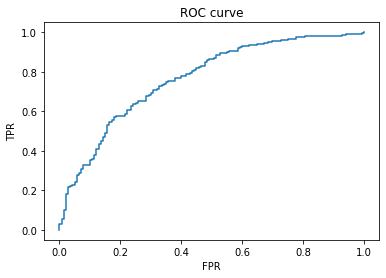

In [1796]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [1798]:
roc_auc_score(y_test, grid.predict_proba(preprocess.transform(X_test))[:,1])

0.7657807308970099

# (H) Actionable Insight and Recommendations:

1. Median age of drivers is 33
2. Median monthly income of drivers is 52000
3. Number of churn is just double of non-churn
4. Company should give allowance to churning drivers, which will help in reatining drivers.
5. When their rating is decreasing on monthly or weekly basis, then they should be contacted immediately by a proffesional who    can motivate them in their work.